In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix


import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [2]:
Data=pd.read_csv(r"H:\Machine_Lerning_AM\Data\Bank_Personal_Loan_Modelling(1).csv")
df=pd.DataFrame(Data)
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1/90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0/40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0/30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0/50,2,0,0,0,0,1,0


                                                                  PreProcessing

In [3]:
#checking types of columns
df.dtypes

ID                     int64
Age                    int64
Experience             int64
Income                 int64
ZIP Code               int64
Family                 int64
CCAvg                 object
Education              int64
Mortgage               int64
Personal Loan          int64
Securities Account     int64
CD Account             int64
Online                 int64
CreditCard             int64
dtype: object

In [4]:
#converting columns to float

# Step 1: Convert all entries in 'CCAvg' to string
df['CCAvg'] = df['CCAvg'].astype(str)

# Step 2: Replace '/' with '.' in 'CCAvg' column
df['CCAvg'] = df['CCAvg'].str.replace('/', '.')

# Step 3: Convert 'CCAvg' to float
df['CCAvg'] = df['CCAvg'].astype(float)

# Verify the result

print(df.dtypes)

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object


In [5]:
print(df.dtypes)

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object


In [6]:
df=pd.DataFrame(df)

In [7]:
# editing the names of columns
df.columns=df.columns.str.replace(" ", "")

In [8]:
df.isnull().sum()

ID                   0
Age                  0
Experience           0
Income               0
ZIPCode              0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

df.dropna()

In [9]:
df.describe(include='all')

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [10]:
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [11]:
df.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


counts of all of columns are equall.Moreover, according to df.head and df.tail, it seems that all columns are filled with data. 
So, there is no missing value

                                                          Visualization 

In [12]:
#ploting countplot figures for numerical featurres 

In [13]:
Data2=pd.read_csv(r"H:\Machine_Lerning_AM\Data\Bank_Personal_Loan_Modelling(1).csv")
df2=pd.DataFrame(Data)
#  Convert 'CCAvg' to float
df2['ZIP Code'] = df2['ZIP Code'].astype(str)
df2.dtypes

ID                     int64
Age                    int64
Experience             int64
Income                 int64
ZIP Code              object
Family                 int64
CCAvg                 object
Education              int64
Mortgage               int64
Personal Loan          int64
Securities Account     int64
CD Account             int64
Online                 int64
CreditCard             int64
dtype: object

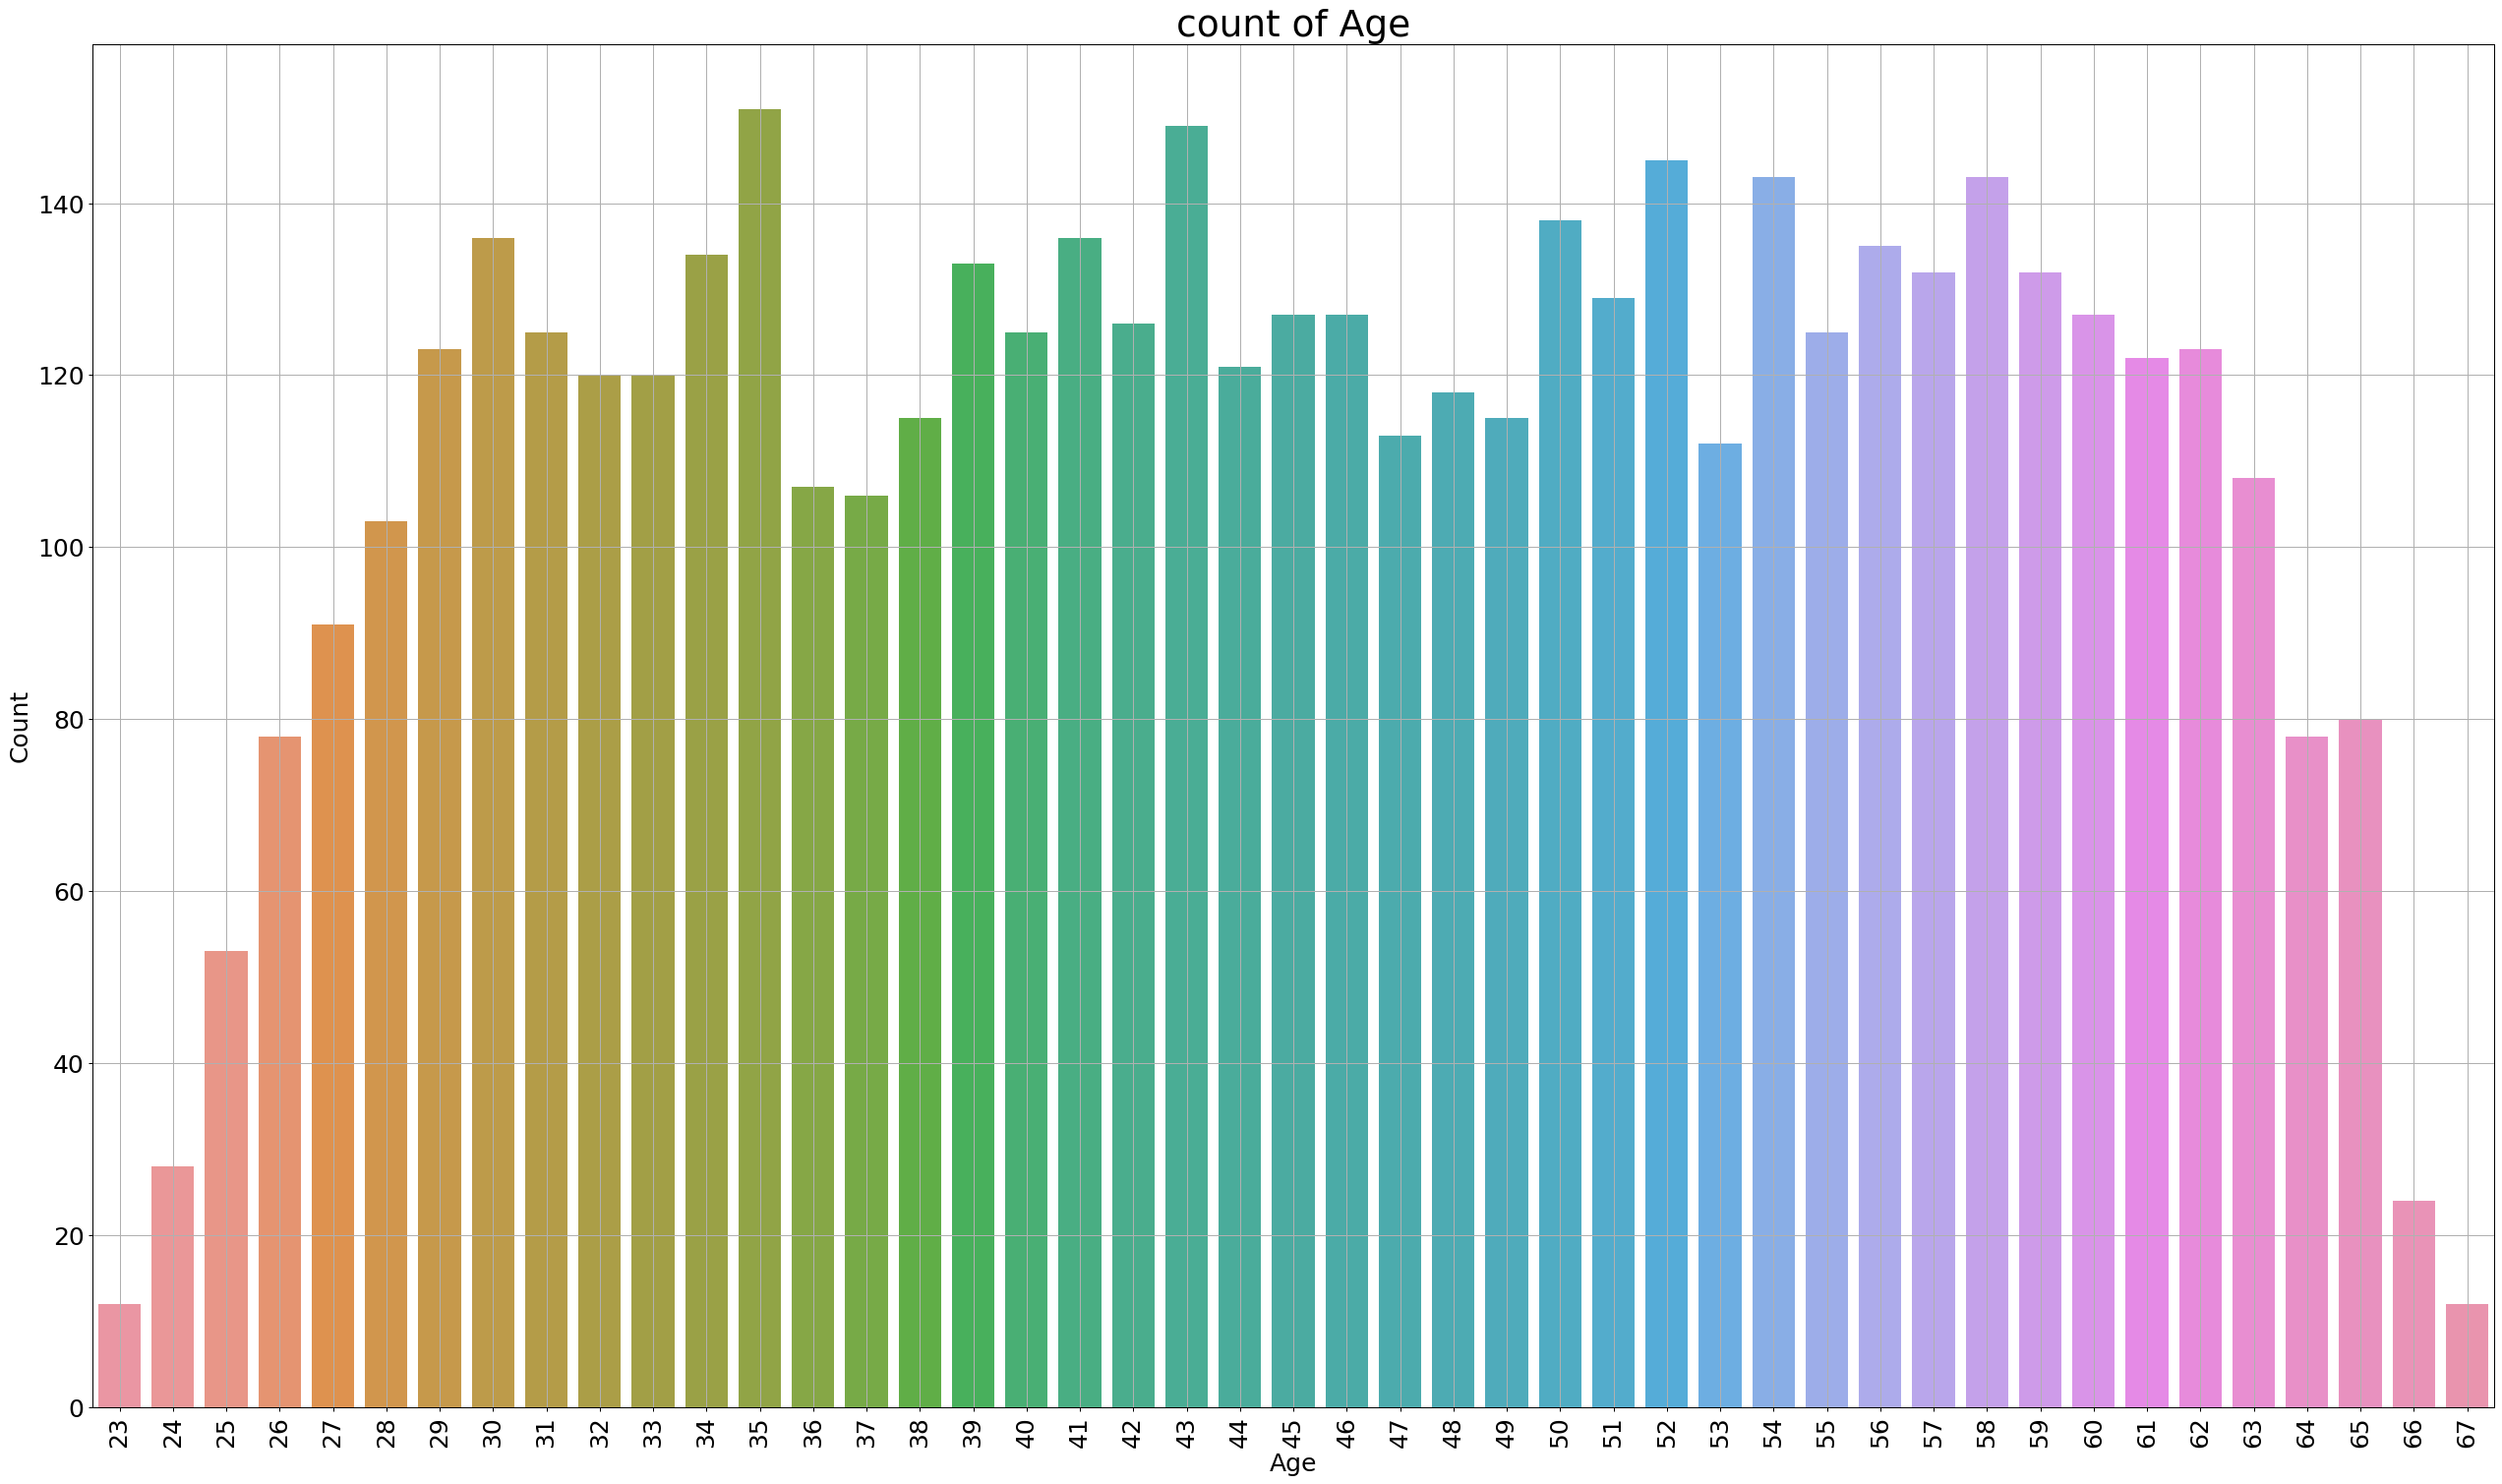

In [14]:
plt.figure(figsize=(35,20), dpi=90)
ax=sns.countplot(x="Age", data=df)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Age", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title("count of Age", fontsize=30)
plt.grid()

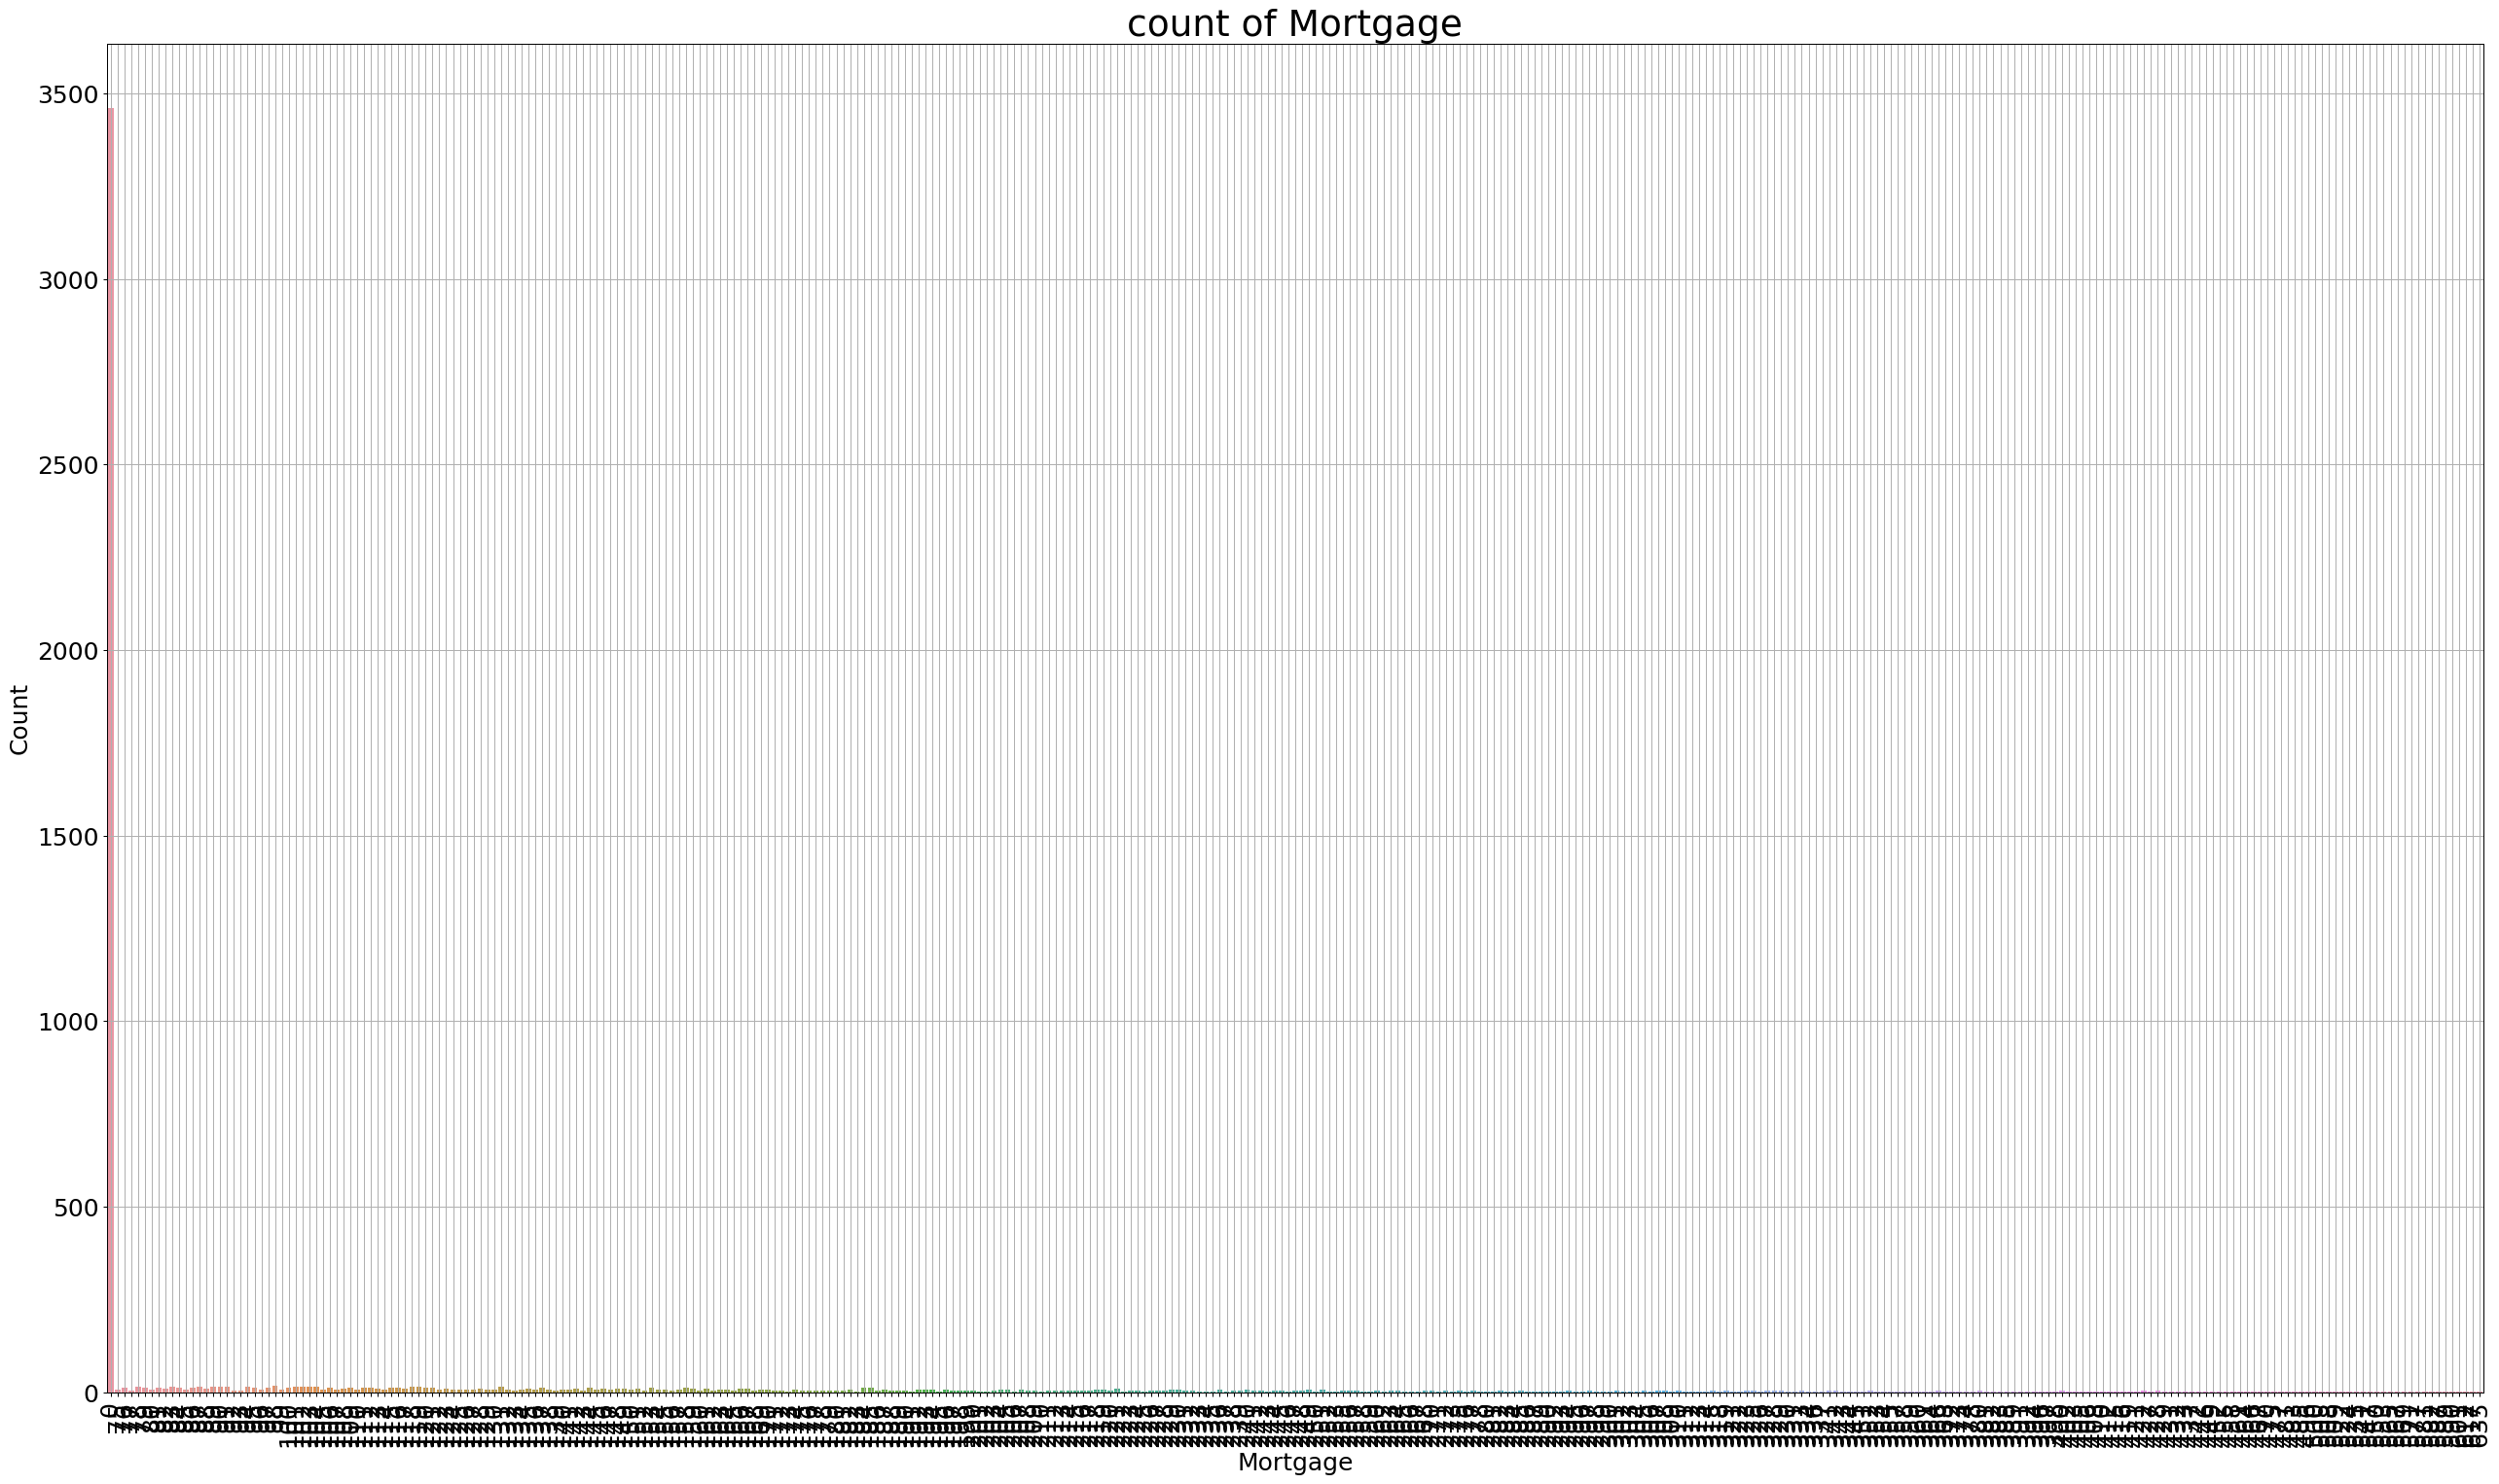

In [15]:
plt.figure(figsize=(35,20), dpi=90)
ax=sns.countplot(x="Mortgage", data=df)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Mortgage", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title("count of Mortgage", fontsize=30)
plt.grid()

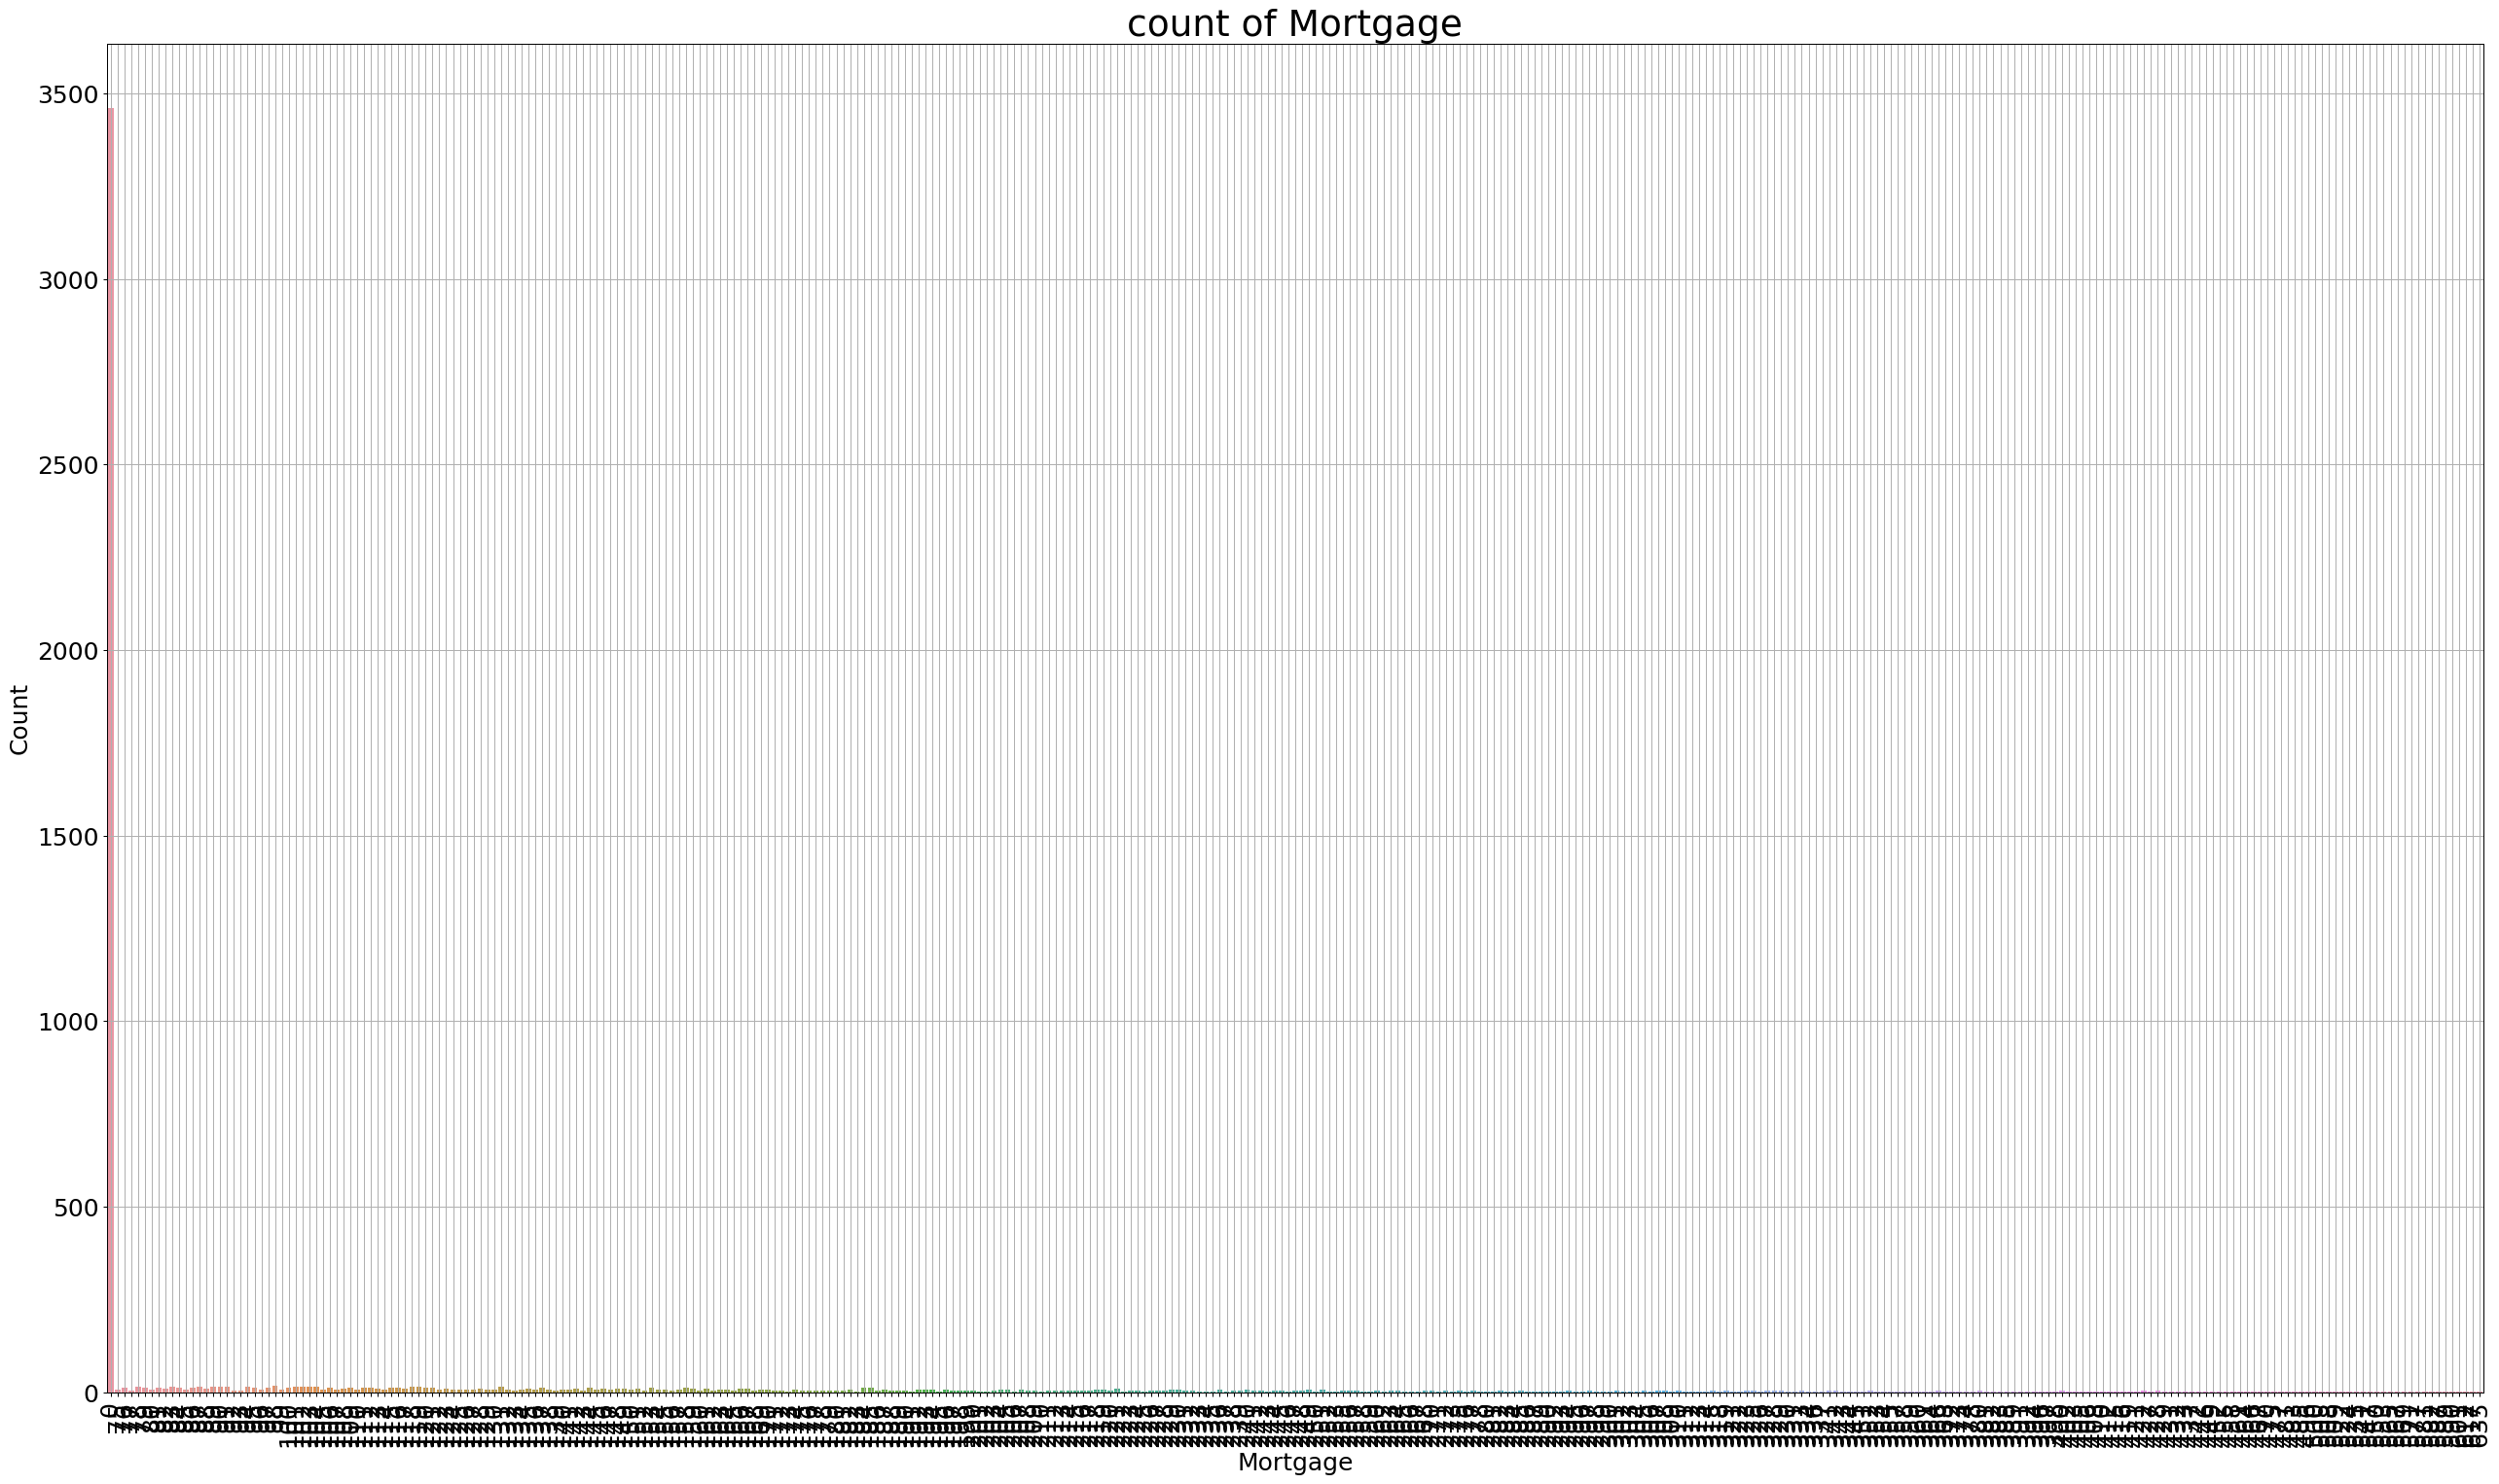

In [16]:
plt.figure(figsize=(35,20), dpi=90)
ax=sns.countplot(x="Mortgage", data=df)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Mortgage", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title("count of Mortgage", fontsize=30)
plt.grid()

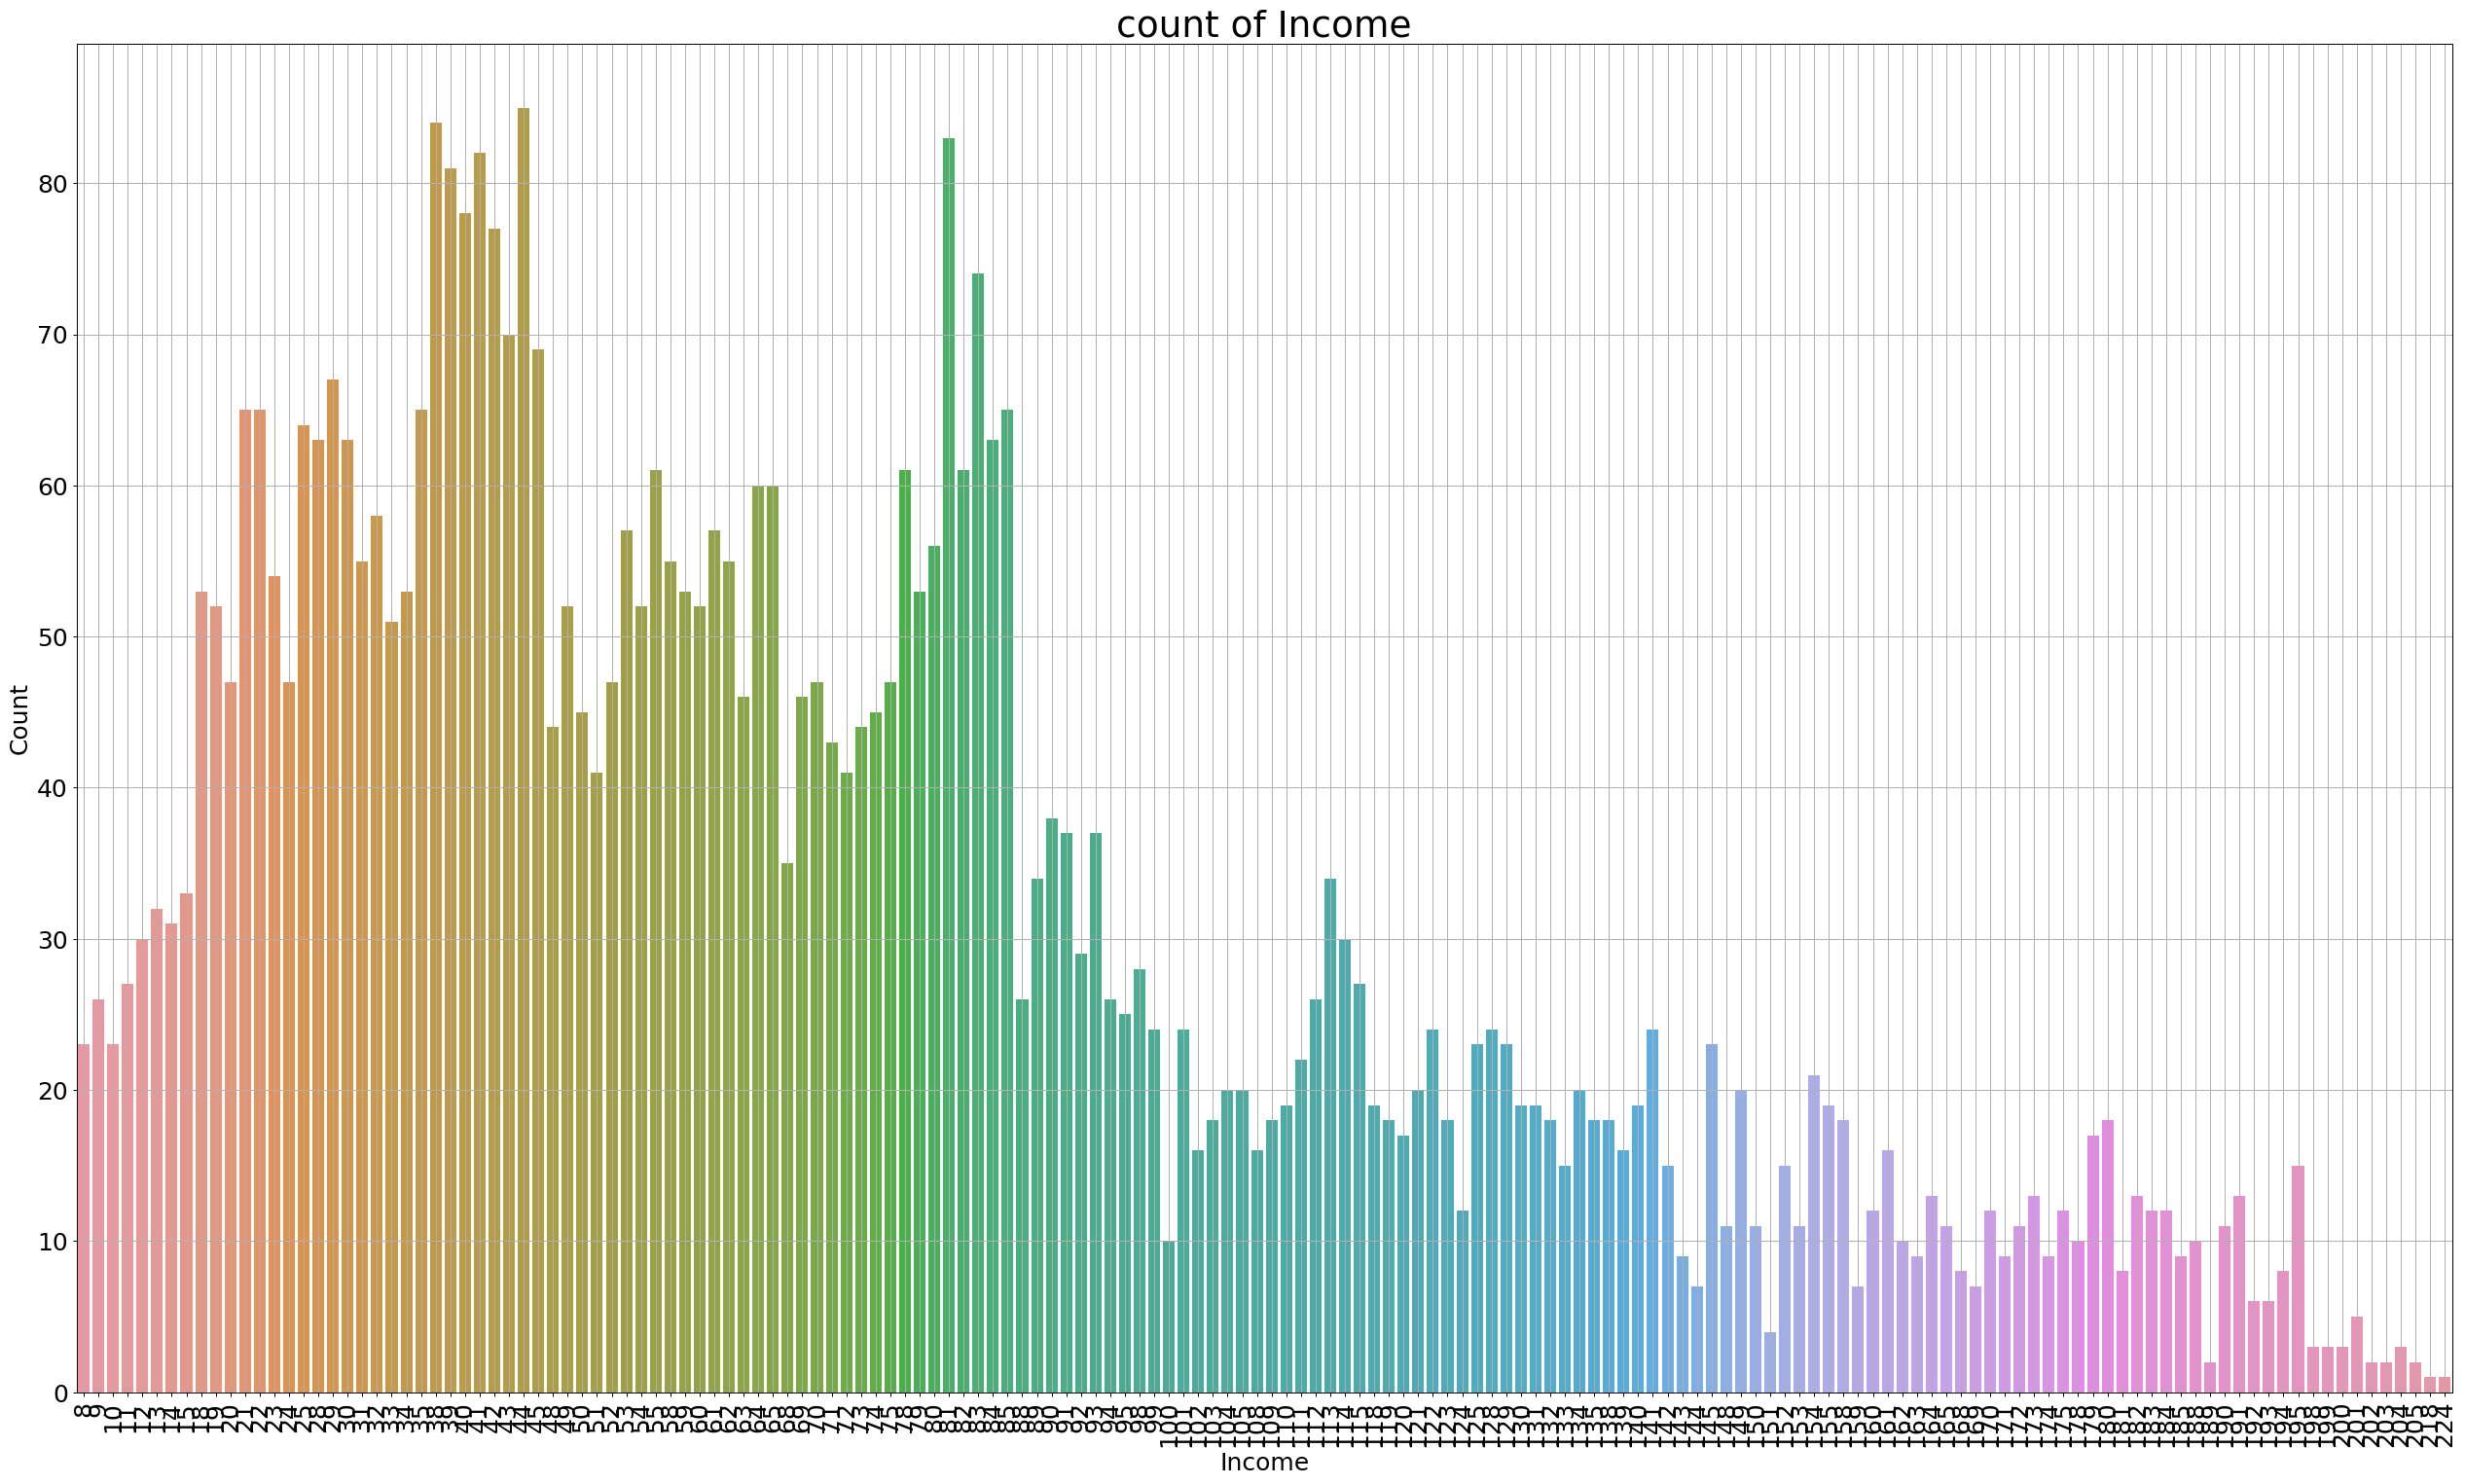

In [17]:
plt.figure(figsize=(35,20), dpi=90)
ax=sns.countplot(x="Income", data=df) #or df3?
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Income", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title("count of Income", fontsize=30)
plt.grid()

In [18]:
#توزیع به سمت  چپ شیفت پیدا کرده است

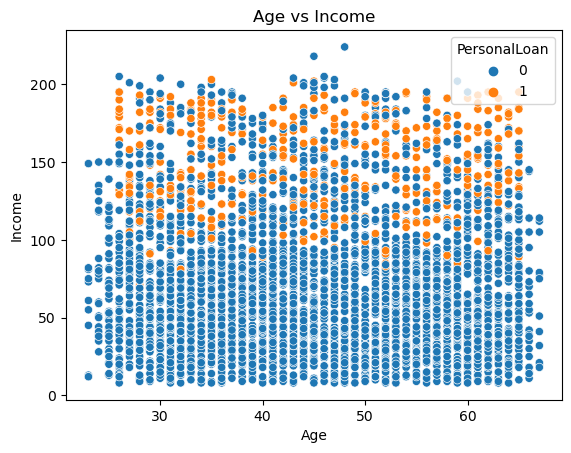

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt




# Scatter plot with 'hue' argument
sns.scatterplot(x="Age", y="Income", hue="PersonalLoan", data=df)

plt.title('Age vs Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()







It shows that the effect of Income is more important than Age factor to dedicaton loan



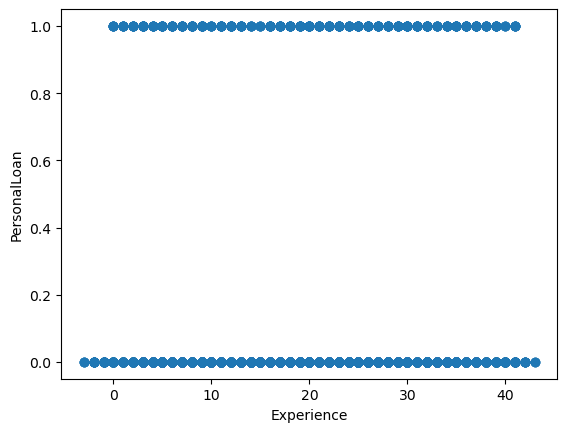

In [20]:
plt.scatter(df["Experience"], df["PersonalLoan"])
plt.xlabel('Experience')
plt.ylabel('PersonalLoan')
plt.show()

In [21]:
df=df[df["Experience"]>0]
df.reset_index(drop=True, inplace=True)

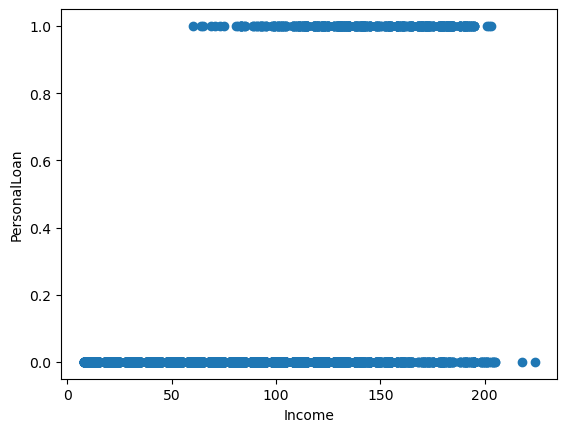

In [22]:
plt.scatter(df["Income"], df["PersonalLoan"])
plt.xlabel("Income")
plt.ylabel("PersonalLoan")

plt.show()

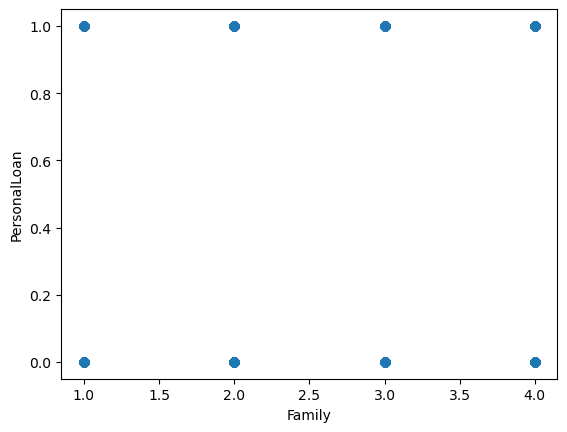

In [23]:
plt.scatter(df["Family"], df["PersonalLoan"])
plt.xlabel("Family")
plt.ylabel("PersonalLoan")

plt.show()

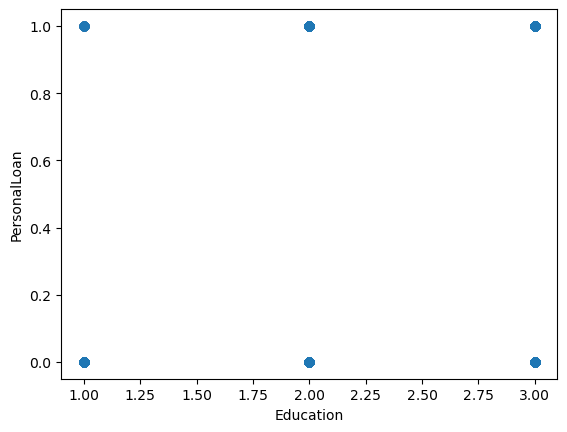

In [24]:
plt.scatter(df["Education"], df["PersonalLoan"])
plt.xlabel("Education")
plt.ylabel("PersonalLoan")

plt.show()

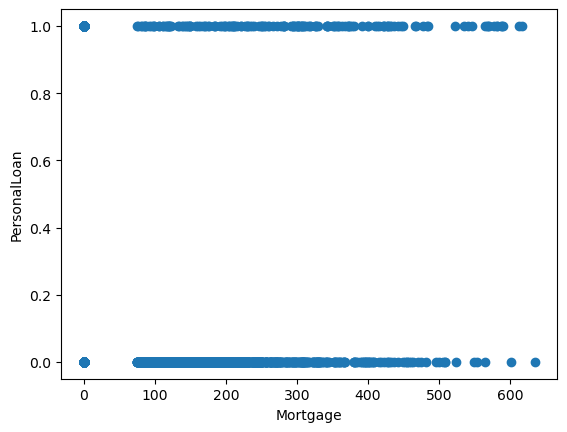

In [25]:
plt.scatter(df["Mortgage"], df["PersonalLoan"])
plt.xlabel("Mortgage")
plt.ylabel("PersonalLoan")

plt.show()

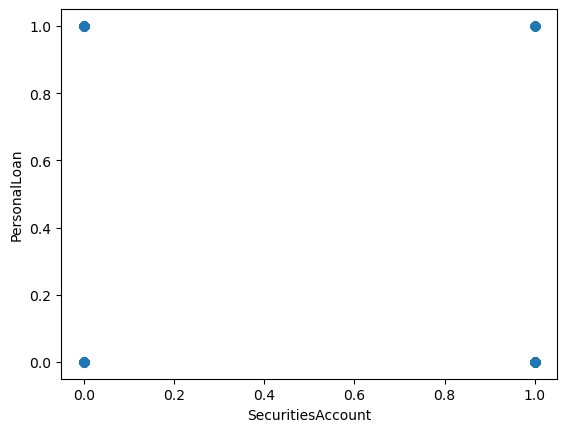

In [26]:
plt.scatter(df["SecuritiesAccount"], df["PersonalLoan"])
plt.xlabel("SecuritiesAccount")
plt.ylabel("PersonalLoan")

plt.show()

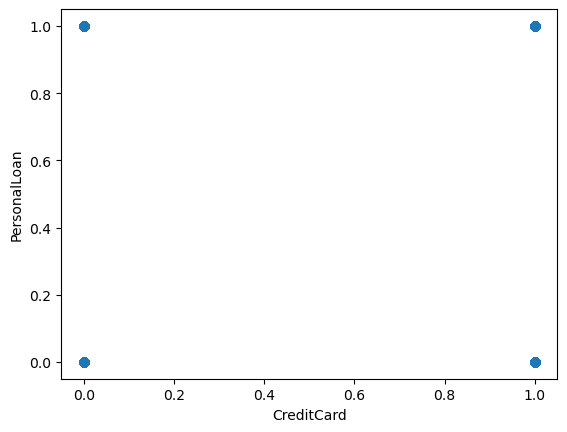

In [27]:
plt.scatter(df["CreditCard"], df["PersonalLoan"])
plt.xlabel("CreditCard")
plt.ylabel("PersonalLoan")

plt.show()

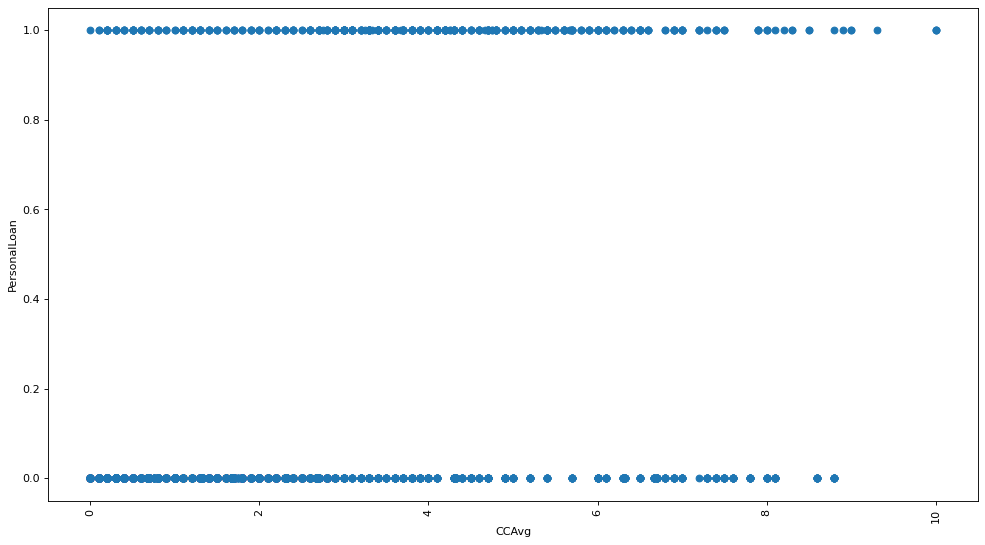

In [28]:
plt.figure(figsize=(15,8), dpi=80)
plt.scatter(df["CCAvg"], df["PersonalLoan"])
plt.xticks(rotation=90)
plt.xlabel("CCAvg")
plt.ylabel("PersonalLoan")
plt.show()

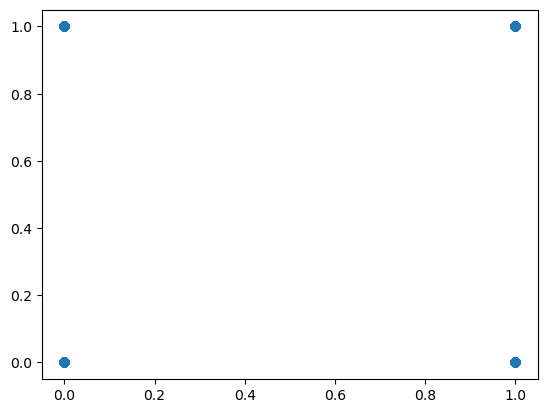

In [29]:

plt.scatter(df["CDAccount"], df["PersonalLoan"])
plt.show()

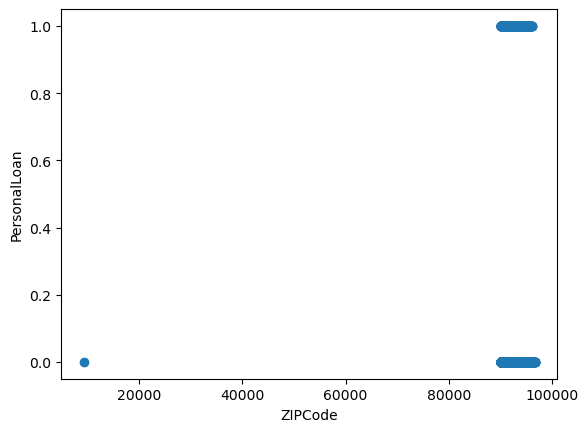

In [30]:
plt.scatter(df["ZIPCode"], df["PersonalLoan"])
plt.xlabel("ZIPCode")
plt.ylabel("PersonalLoan")

plt.show()

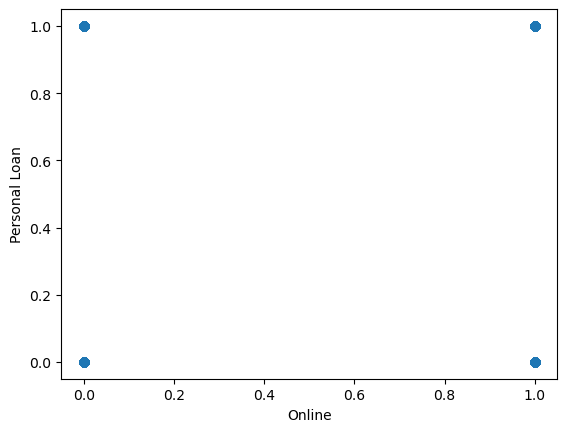

In [31]:
plt.scatter(df["Online"], df["PersonalLoan"])
plt.xlabel("Online")
plt.ylabel("Personal Loan")

plt.show()

In [32]:
# Calculate correlation matrix
corr_matrix=df.corr()
corr_matrix

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
ID,1.000000,-0.003785,-0.003156,-0.016853,0.012690,-0.015329,-0.026599,0.018691,-0.010262,-0.024235,-0.018785,-0.006051,-0.001241,0.019378
Age,-0.003785,1.000000,0.993918,-0.061900,-0.029059,-0.032182,-0.052185,0.055843,-0.019232,-0.014213,0.001993,0.000233,0.007685,0.004020
Experience,-0.003156,0.993918,1.000000,-0.052955,-0.028182,-0.038326,-0.049912,0.027819,-0.017640,-0.013780,0.000916,0.002392,0.007429,0.005466
Income,-0.016853,-0.061900,-0.052955,1.000000,-0.015726,-0.155857,0.644857,-0.187229,0.207843,0.503433,-0.002420,0.169941,0.015950,-0.003331
ZIPCode,0.012690,-0.029059,-0.028182,-0.015726,1.000000,0.012246,-0.003459,-0.019735,0.007279,0.001087,0.003456,0.020443,0.018178,0.008281
Family,-0.015329,-0.032182,-0.038326,-0.155857,0.012246,1.000000,-0.106727,0.061632,-0.017856,0.062346,0.016860,0.016467,0.010335,0.014084
CCAvg,-0.026599,-0.052185,-0.049912,0.644857,-0.003459,-0.106727,1.000000,-0.134311,0.110953,0.368715,0.013799,0.137307,-0.001032,-0.007898
Education,0.018691,0.055843,0.027819,-0.187229,-0.019735,0.061632,-0.134311,1.000000,-0.030555,0.137956,-0.008331,0.013767,-0.014030,-0.013797
Mortgage,-0.010262,-0.019232,-0.017640,0.207843,0.007279,-0.017856,0.110953,-0.030555,1.000000,0.144046,-0.001999,0.090551,-0.007575,-0.006957
PersonalLoan,-0.024235,-0.014213,-0.013780,0.503433,0.001087,0.062346,0.368715,0.137956,0.144046,1.000000,0.022184,0.316987,0.006782,0.003771


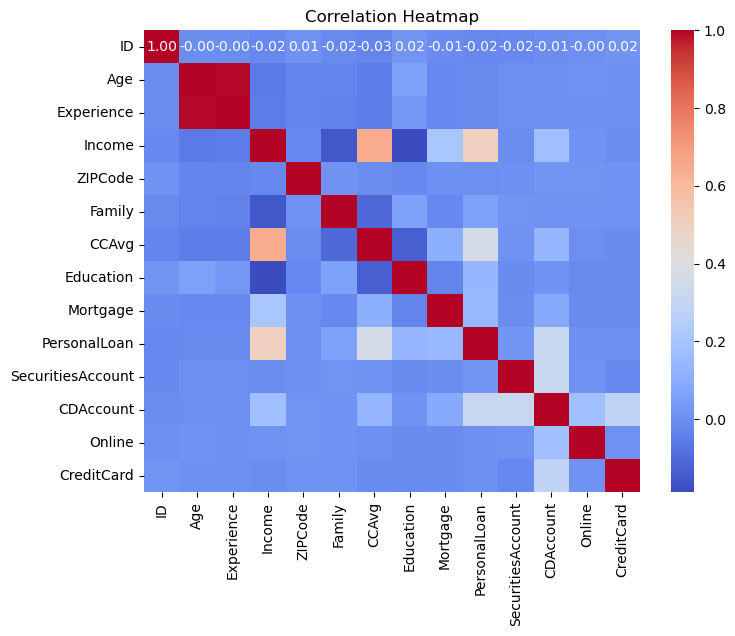

In [33]:

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


the results of correlation confirm that 'personal Loan' has the most correlation with 'income'

and 'Income'has the most correlation with 'CCAvg'.so, we plot the following plots:

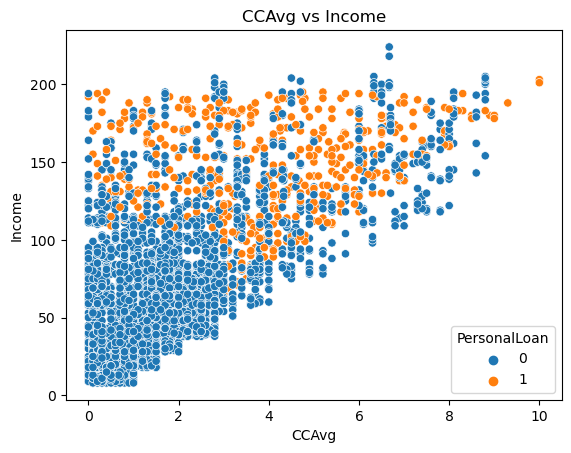

In [34]:


sns.scatterplot(x="CCAvg", y="Income", hue="PersonalLoan", data=df)

plt.title('CCAvg vs Income')
plt.xlabel('CCAvg')
plt.ylabel('Income')
plt.show()


Loading BokehJS ...

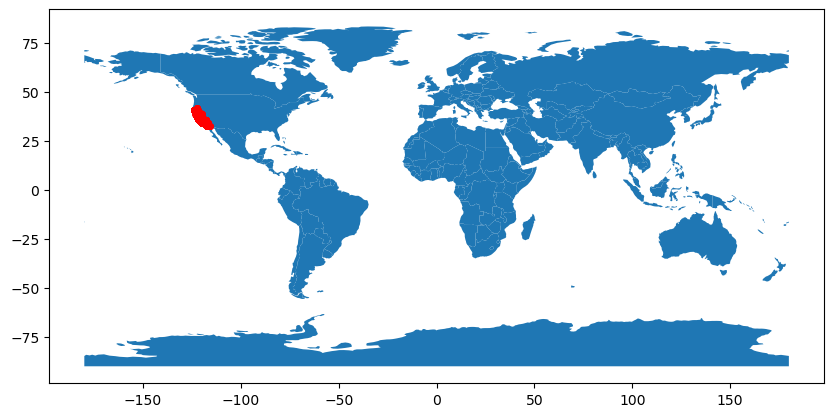

In [35]:
import pandas as pd
import pandas_bokeh
import matplotlib.pyplot as plt
import pgeocode
import geopandas as gpd
from shapely.geometry import Point
from geopandas import GeoDataFrame
pandas_bokeh.output_notebook()
df2=df.copy()
nomi = pgeocode.Nominatim('us')
df2['ZIPCode'] = df2['ZIPCode'].astype(str)

df2['Latitude'] = (nomi.query_postal_code(df2['ZIPCode'].tolist()).latitude)
df2['Longitude'] = (nomi.query_postal_code(df2['ZIPCode'].tolist()).longitude)

geometry = [Point(xy) for xy in zip(df2['Longitude'], df2['Latitude'])]
gdf = GeoDataFrame(df2, geometry=geometry)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);
plt.savefig('world.jpg')





In [36]:
df.columns
df

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4877,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4878,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4879,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4880,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


                                                          MACHINE LEARNING 

In [37]:

# feature selection 
x = df.drop ("PersonalLoan" , axis = 1)
y = df.PersonalLoan.values.reshape (-1 , 1)


x


,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4877,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0
4878,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0
4879,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0
4880,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0


In [61]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Scaling
scaler = StandardScaler()
X_selected = scaler.fit_transform(x)

# Train & test split
x_train, x_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=0)



                                              1. Logistic Regression 

In [39]:

# model 
from sklearn.linear_model import LogisticRegression 
logreg1 = LogisticRegression (solver = "liblinear")
# train & predict
logreg1.fit (x_train , y_train.ravel())
y_pred = logreg1.predict (x_test)
# score
print ("Accuracy : " , metrics.accuracy_score (y_test , y_pred))

Accuracy :  0.9600818833162743


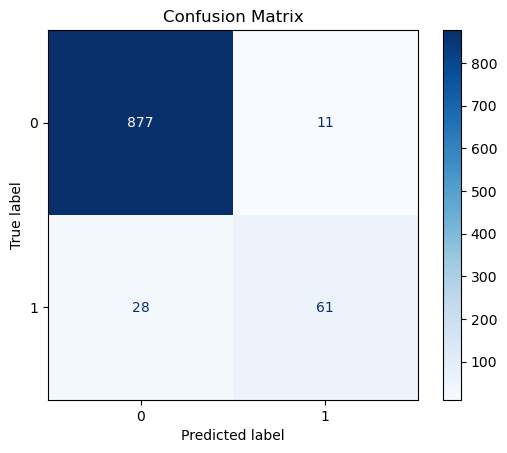

In [40]:

# Confusion Matrix for Logistic Regression 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Make predictions
y_pred = logreg1.predict(x_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


True Negative= 877
False Positive= 11
False Negative=28
True Negative=61


                                                     **Improving LogisticRegression Model**

                                                        I. Cross Validation

In [41]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [42]:

# Model definition
Logreg = LogisticRegression(solver="liblinear")

# Different k values for k-fold cross-validation
k_values = [3, 5, 10]

# Perform cross-validation for each k
for k in k_values:
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    scores = cross_val_score(Logreg, X_selected, y, cv=kf, scoring='accuracy')
    
    print(f"KFold={k} | Accuracy: {np.mean(scores):.4f} | Standard Deviation: {np.std(scores):.4f}")
    print(scores)

KFold=3 | Accuracy: 0.9498 | Standard Deviation: 0.0078
[0.9527027  0.93915181 0.95759066]
KFold=5 | Accuracy: 0.9496 | Standard Deviation: 0.0059
[0.94984647 0.94984647 0.93954918 0.95081967 0.9579918 ]
KFold=10 | Accuracy: 0.9502 | Standard Deviation: 0.0069
[0.95705521 0.94274029 0.95286885 0.94877049 0.94262295 0.93852459
 0.95081967 0.95081967 0.95696721 0.96106557]


Cross Validation Accuracy :0.9502 <Accuracy :  0.96. So, Cross Validation does not improve the model.

                                              II. Test Size (improving Logestic Regression model)

In [46]:
# Evaluate the model with different test sizes
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
logreg3=LogisticRegression(max_iter=1000)
# Test sizes to evaluate
test_sizes = np.arange(.10, .35, .01)

# Store results
results = []

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=test_size, random_state=42)
    logreg3.fit(X_train, y_train)
    y_pred_tSize = logreg3.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred_tSize)
    precision = precision_score(y_test, y_pred_tSize)
    recall = recall_score(y_test, y_pred_tSize)
    f1 = f1_score(y_test, y_pred_tSize)
    
    results.append({
        'test_size': test_size,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    })

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

print(results_df.nlargest(3, 'accuracy'))


    test_size  accuracy  precision    recall        f1
0        0.10  0.957055   0.900000  0.600000  0.720000
1        0.11  0.959108   0.906250  0.604167  0.725000
2        0.12  0.955631   0.885714  0.584906  0.704545
3        0.13  0.957480   0.894737  0.596491  0.715789
4        0.14  0.951754   0.840909  0.587302  0.691589
5        0.15  0.952251   0.833333  0.597015  0.695652
6        0.16  0.952685   0.833333  0.616438  0.708661
7        0.17  0.955422   0.847458  0.641026  0.729927
8        0.18  0.954494   0.861538  0.643678  0.736842
9        0.19  0.948276   0.828571  0.617021  0.707317
10       0.20  0.949846   0.830986  0.614583  0.706587
11       0.21  0.950292   0.840000  0.617647  0.711864
12       0.22  0.948837   0.846154  0.605505  0.705882
13       0.23  0.948353   0.851852  0.600000  0.704082
14       0.24  0.948805   0.857143  0.600000  0.705882
15       0.25  0.947584   0.840909  0.596774  0.698113
16       0.26  0.948819   0.833333  0.600000  0.697674
17       0

                                                           III. Feature Engineering
                                                            a. Feature Selection

In [47]:
from sklearn.feature_selection import RFE

selector = RFE(estimator=LogisticRegression(), n_features_to_select=10)
selector = selector.fit(x, y)
X_selected = selector.transform(x)
# train & test
x_train , x_test , y_train , y_test = train_test_split (X_selected , y , test_size = .2 , random_state = 0)
# model 

logreg4 = LogisticRegression (solver = "liblinear")
# train & predict
logreg4.fit (x_train , y_train.ravel())
y_pred = logreg4.predict (x_test)
# score
print ("Accuracy : " , metrics.accuracy_score (y_test , y_pred))

Accuracy :  0.9529170931422722


                                                            IV. Hyperparameter Tuning
                                                               a. Grid Search


In [48]:

# Grid Search to find the best hyperparameters for  Logistic Regression model.
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'solver':['liblinear', 'saga'] ,
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'max_iter' : range (90 , 110 , 5)
}

# Instantiate the Logistic Regression classifier
lr = LogisticRegression(solver='liblinear')

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Perform grid search
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

print(grid_search.best_score_)              # best score with different values

Fitting 5 folds for each of 112 candidates, totalling 560 fits
Best parameters found:  {'C': 100, 'max_iter': 90, 'penalty': 'l1', 'solver': 'liblinear'}
0.9518565941101151


With changing parameters we did not reach to a higher score. So, we do not consider this approach for model improvement.
0.9600818833162743> 0.9505761843790012

In [49]:

# train & test
x_train , x_test , y_train , y_test = train_test_split (X_selected , y , test_size = .2 , random_state = 0)
# model 


logreg6 = LogisticRegression(C=1, max_iter=90, penalty='l2', solver='liblinear')

# train & predict
logreg6.fit (x_train , y_train.ravel())
y_pred = logreg6.predict (x_test)
# score
print ("Accuracy : " , metrics.accuracy_score (y_test , y_pred))

Accuracy :  0.9529170931422722


                                                   V. Checking imbalancing 

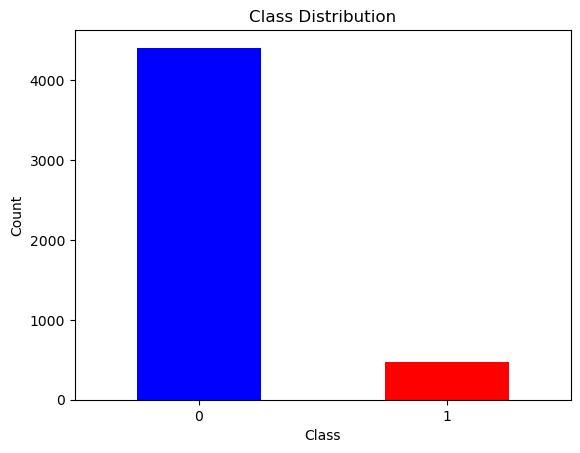

In [50]:
# Plot the distribution of classes using a bar plot
df['PersonalLoan'].value_counts().plot(kind='bar', color=['blue', 'red'])  
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

In [51]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, f1_score
from imblearn.over_sampling import SMOTE


lr = LogisticRegression()

# Define parameter grid for GridSearchCV
param_grid = {
    'class_weight': ['balanced', None],  # Try with balanced class weights and without
    
}

# Define F1-score as the evaluation metric
scorer = make_scorer(f1_score)



# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, scoring=scorer)

# Fit GridSearchCV to training data
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best parameters found: ", grid_search.best_params_)

# Predict on test data
y_pred = grid_search.predict(X_test)

# Evaluate model performance on test data
f1 = f1_score(y_test, y_pred)
print("F1-score on test data:", f1)


Best parameters found:  {'class_weight': 'balanced'}
F1-score on test data: 0.15867768595041323


In [52]:
from sklearn.linear_model import LogisticRegression

# Instantiate Logistic Regression classifier with balanced class weights
LogReg5 = LogisticRegression(class_weight='balanced')

# Fit the model to the training data
LogReg5.fit(x_train, y_train)

# Calculate accuracy on the training data
accuracy = LogReg5.score(x_train, y_train)
print("Accuracy:", accuracy)


Accuracy: 0.8860435339308579


                                                            Loss Function 

In [62]:
# checking loss functions 
print ( classification_report ( y , logreg1.predict (X_selected)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      4409
           1       0.83      0.63      0.72       473

    accuracy                           0.95      4882
   macro avg       0.90      0.81      0.85      4882
weighted avg       0.95      0.95      0.95      4882



So, Accuracy for LogisticRegression Modle :  0.9600818833162743

                                                        2. Naive Bayes Modeling 

In [63]:
df.Mortgage.unique()

array([  0, 155, 104, 134, 111, 260, 163, 159,  97, 122, 193, 198, 285,
       412, 153, 211, 207, 240, 455, 112, 336, 132, 118, 174, 126, 236,
       166, 136, 309, 103, 366, 101, 251, 276, 161, 149, 188, 116, 135,
       244, 164,  81, 315, 140,  95,  89,  90, 105, 100, 282, 209, 249,
        91,  98, 145, 150, 169, 280,  99,  78, 264, 113, 117, 325, 121,
       138,  77, 158, 109, 131, 391,  88, 129, 196, 617, 123, 167, 190,
       248,  82, 402, 360, 392, 185, 419, 270, 148, 466, 175, 147, 220,
       133, 182, 290, 125, 124, 224, 141, 119, 139, 115, 458, 172, 156,
       547, 470, 304, 221, 108, 179, 271, 378,  76,  87, 203, 180, 230,
       137, 152, 485, 300, 272, 144,  94, 208, 275,  83, 218, 327, 322,
       205, 227,  85, 160, 364, 449,  75, 107,  92, 187, 355, 314, 106,
       587, 214, 307, 263, 310, 127, 252, 170, 265, 177, 305, 372,  79,
       301, 232, 289, 212, 250,  84, 130, 303, 256, 259, 204, 524, 157,
       231, 287, 247, 333, 229, 357, 361, 294,  86, 329, 142, 18

In [64]:
Data=pd.read_csv(r"H:\Machine_Lerning_AM\Data\Bank_Personal_Loan_Modelling(1).csv")
df=pd.DataFrame(Data)

df.drop("ID", axis=1, inplace=True)
# editing the names of columns
df.columns=df.columns.str.replace(" ", "")

In [65]:
#converting columns to float

# Step 1: Convert all entries in 'CCAvg' to string
df['CCAvg'] = df['CCAvg'].astype(str)

# Step 2: Replace '/' with '.' in 'CCAvg' column
df['CCAvg'] = df['CCAvg'].str.replace('/', '.')

# Step 3: Convert 'CCAvg' to float
df['CCAvg'] = df['CCAvg'].astype(float)

# Verify the result

print(df.dtypes)

Age                    int64
Experience             int64
Income                 int64
ZIPCode                int64
Family                 int64
CCAvg                float64
Education              int64
Mortgage               int64
PersonalLoan           int64
SecuritiesAccount      int64
CDAccount              int64
Online                 int64
CreditCard             int64
dtype: object


In [66]:
# features definition
x = df.drop ("PersonalLoan", axis = 1)
y = df ["PersonalLoan"]#.values.reshape (-1 , 1)

Scaler = StandardScaler ()
X_selected = Scaler.fit_transform (x)

x_train , x_test , y_train , y_test = train_test_split (X_selected , y , test_size = .2 )

In [67]:
print(X_selected.shape)
print(x_train.shape)
print(y_train.shape)

(5000, 12)
(4000, 12)
(4000,)


In [68]:
#Modeling GaussianNB

from sklearn.naive_bayes import GaussianNB

Gaussian=GaussianNB()

Gaussian.fit(x_train, y_train.ravel())
y_pred=Gaussian.predict(x_test)
Accuracy_GaussianNB=metrics.accuracy_score(y_test,  y_pred)
print("Accuracy of GaussianNB", Accuracy_GaussianNB)

Accuracy of GaussianNB 0.891


In [69]:
Gaussian.classes_

array([0, 1], dtype=int64)

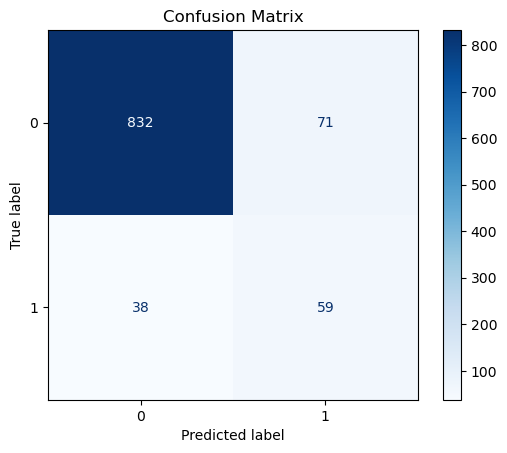

In [70]:
# Confusion Matrix for GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay




# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


True False=832
False Positive=71
False Negative=38
True  Positive=59

Accuracy of GaussianNB 0.887410440122825

                                                     Improving GaussianNB

                                                     I. Cross Validation for GaussianNB

In [71]:
 #Define the model
GaussianNB = GaussianNB()

# Different k values for k-fold cross-validation
k_values = [3, 5, 10]

# Perform cross-validation for each k
for k in k_values:
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    scores = cross_val_score(GaussianNB, X_selected, y, cv=kf, scoring='accuracy')
    
    print(f"KFold={k} | Accuracy: {np.mean(scores):.4f} | Standard Deviation: {np.std(scores):.4f}")
    print(scores)

KFold=3 | Accuracy: 0.8828 | Standard Deviation: 0.0066
[0.88782244 0.87342531 0.88715486]
KFold=5 | Accuracy: 0.8826 | Standard Deviation: 0.0123
[0.895 0.876 0.881 0.864 0.897]
KFold=10 | Accuracy: 0.8838 | Standard Deviation: 0.0145
[0.878 0.914 0.88  0.874 0.878 0.888 0.862 0.872 0.902 0.89 ]


0.8874> 0.8838
Note: Different Kfolds did not improve the GaussianNB Model. 


                                           II. Test Size (improving GaussianNB)         

In [72]:
# Evaluate the model with different test sizes
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Test sizes to evaluate
test_sizes = np.arange(.10, .35, .01)

# Store results
results = []

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=test_size, random_state=42)
    GaussianNB.fit(X_train, y_train)
    y_pred_tSize = GaussianNB.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred_tSize)
    precision = precision_score(y_test, y_pred_tSize)
    recall = recall_score(y_test, y_pred_tSize)
    f1 = f1_score(y_test, y_pred_tSize)
    
    results.append({
        'test_size': test_size,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    })

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)

# Display the results
print(results_df)
top3_accuracy = results_df.nlargest(3, 'accuracy') 
top3_accuracy

    test_size  accuracy  precision    recall        f1
0        0.10  0.878000   0.444444  0.518519  0.478632
1        0.11  0.883636   0.457143  0.551724  0.500000
2        0.12  0.890000   0.472973  0.564516  0.514706
3        0.13  0.893846   0.481013  0.575758  0.524138
4        0.14  0.894286   0.494118  0.575342  0.531646
5        0.15  0.897333   0.516484  0.587500  0.549708
6        0.16  0.896250   0.505155  0.583333  0.541436
7        0.17  0.890588   0.490909  0.593407  0.537313
8        0.18  0.890000   0.491525  0.597938  0.539535
9        0.19  0.891579   0.496000  0.607843  0.546256
10       0.20  0.895000   0.500000  0.619048  0.553191
11       0.21  0.894286   0.507143  0.628319  0.561265
12       0.22  0.898182   0.514085  0.629310  0.565891
13       0.23  0.894783   0.506667  0.617886  0.556777
14       0.24  0.895000   0.518987  0.621212  0.565517
15       0.25  0.891200   0.494048  0.619403  0.549669
16       0.26  0.890769   0.488506  0.615942  0.544872
17       0

,test_size,accuracy,precision,recall,f1
12,0.22,0.898182,0.514085,0.629310,0.565891
5,0.15,0.897333,0.516484,0.587500,0.549708
6,0.16,0.896250,0.505155,0.583333,0.541436


                                            III.  Hyperparameter Tuning for GaussinNB

In [73]:
print(x_train.shape)
print(y_train.shape)

(4000, 12)
(3300,)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters: {'var_smoothing': 1.0}
Accuracy: 0.9245454545454546


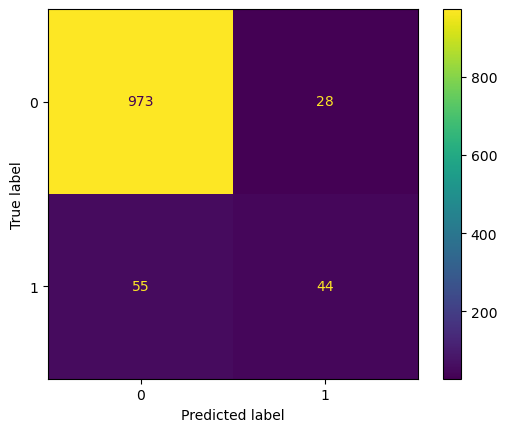

In [75]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt


scaler = StandardScaler()
X_selected = scaler.fit_transform(x)

# Train & test split
x_train, x_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.22, random_state=0)

# Initialize the model
Gaussian = GaussianNB()

# Define the parameter grid
param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=Gaussian, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Best model
best_gnb = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_gnb.predict(x_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Show the plot
plt.show()


0.925>  0.89. So, Hyperparameter Tuning worked for GaussianNB

                                                     3.Complement Naive Bayes

In [76]:
print('shape of y',y.shape)
print('shape of X_selected', X_selected.shape)
print(df.shape)

shape of y (5000,)
shape of X_selected (5000, 12)
(5000, 13)


In [77]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.naive_bayes import ComplementNB
from sklearn.preprocessing import MinMaxScaler



# Normalize the feature matrix using MinMaxScaler to ensure all values are non-negative
scaler = MinMaxScaler()
X_selected = scaler.fit_transform(x)

# Instantiate the Complement Naive Bayes model
cnb = ComplementNB()

# List of k values for k-fold cross-validation
k_values = [3, 5, 10]

# Perform cross-validation for each k
for k in k_values:
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    scores = cross_val_score(cnb, X_selected, y, cv=kf, scoring='accuracy')
    
    print(f"KFold={k} | Accuracy: {np.mean(scores):.4f} | Standard Deviation: {np.std(scores):.4f}")
    print(scores)


KFold=3 | Accuracy: 0.8536 | Standard Deviation: 0.0039
[0.85362927 0.84883023 0.85834334]
KFold=5 | Accuracy: 0.8524 | Standard Deviation: 0.0110
[0.857 0.866 0.842 0.837 0.86 ]
KFold=10 | Accuracy: 0.8534 | Standard Deviation: 0.0134
[0.864 0.852 0.866 0.866 0.84  0.842 0.828 0.844 0.864 0.868]


                                                   II. Test Size (improving ComplementNB)  

In [78]:
# Evaluate the model with different test sizes
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Test sizes to evaluate
test_sizes = np.arange(.10, .35, .01)

# Store results
results = []

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=test_size, random_state=42)
    cnb.fit(X_train, y_train)
    y_pred_tSize = cnb.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred_tSize)
    precision = precision_score(y_test, y_pred_tSize)
    recall = recall_score(y_test, y_pred_tSize)
    f1 = f1_score(y_test, y_pred_tSize)
    
    results.append({
        'test_size': test_size,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    })

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)

# Display the results
print(results_df)
top3_accuracy = results_df.nlargest(3, 'accuracy') 
top3_accuracy

    test_size  accuracy  precision    recall        f1
0        0.10  0.864000   0.425532  0.740741  0.540541
1        0.11  0.854545   0.398148  0.741379  0.518072
2        0.12  0.860000   0.405172  0.758065  0.528090
3        0.13  0.863077   0.406504  0.757576  0.529101
4        0.14  0.855714   0.397059  0.739726  0.516746
5        0.15  0.861333   0.416667  0.750000  0.535714
6        0.16  0.858750   0.405229  0.738095  0.523207
7        0.17  0.852941   0.398810  0.736264  0.517375
8        0.18  0.853333   0.402235  0.742268  0.521739
9        0.19  0.853684   0.403141  0.754902  0.525597
10       0.20  0.857000   0.403061  0.752381  0.524917
11       0.21  0.855238   0.406699  0.752212  0.527950
12       0.22  0.857273   0.406393  0.767241  0.531343
13       0.23  0.858261   0.411504  0.756098  0.532951
14       0.24  0.858333   0.419492  0.750000  0.538043
15       0.25  0.854400   0.403226  0.746269  0.523560
16       0.26  0.854615   0.401544  0.753623  0.523929
17       0

,test_size,accuracy,precision,recall,f1
0,0.10,0.864000,0.425532,0.740741,0.540541
3,0.13,0.863077,0.406504,0.757576,0.529101
5,0.15,0.861333,0.416667,0.750000,0.535714


                                                      III. Hyperparameter Tuning for ComplementNB

In [79]:
# Define the parameter grid for ComplementNB
param_grid = {
    'alpha': [0.1, 0.5, 1.0],        # Add more values if needed
    'fit_prior': [True, False],
    'norm': [True, False]
}

# Set up k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search using GridSearchCV
grid_search = GridSearchCV(estimator=cnb, param_grid=param_grid, cv=kf, scoring='accuracy')
grid_search.fit(X_selected, y)

# Print the best parameters and the best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

# Evaluate the best model on the full dataset
best_cnb = grid_search.best_estimator_
scores = cross_val_score(best_cnb, X_selected, y, cv=kf, scoring='accuracy')

print(f"Final evaluation | Accuracy: {np.mean(scores):.4f} | Standard Deviation: {np.std(scores):.4f}")
print(scores)


Best parameters: {'alpha': 0.1, 'fit_prior': True, 'norm': True}
Best cross-validation accuracy: 0.9114
Final evaluation | Accuracy: 0.9114 | Standard Deviation: 0.0101
[0.901 0.917 0.898 0.924 0.917]


0.9126>0.868000.So, hypertuning for ComplementNB improved the accuracy

                                                          4.MultinomialNB Modeling 

In [80]:

from sklearn.naive_bayes import MultinomialNB
# Ensure x and y have the same number of samples
assert x.shape[0] == y.shape[0], "The number of samples in x and y must be equal."

# Normalize the feature matrix using MinMaxScaler to ensure all values are non-negative
scaler = MinMaxScaler()
X_selected = scaler.fit_transform(x)

# Instantiate the Multinomial Naive Bayes model
mnb = MultinomialNB()

# Define the parameter grid for MultinomialNB
param_grid = {
    'alpha': [0.1, 0.5, 1.0],  # Add more values if needed
    'fit_prior': [True, False]
}

# Set up k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search using GridSearchCV
grid_search = GridSearchCV(estimator=mnb, param_grid=param_grid, cv=kf, scoring='accuracy')
grid_search.fit(X_selected, y)

# Print the best parameters and the best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

# Evaluate the best model on the full dataset
best_mnb = grid_search.best_estimator_
scores = cross_val_score(best_mnb, X_selected, y, cv=kf, scoring='accuracy')

print(f"Final evaluation | Accuracy: {np.mean(scores):.4f} | Standard Deviation: {np.std(scores):.4f}")
print(scores)


Best parameters: {'alpha': 0.1, 'fit_prior': True}
Best cross-validation accuracy: 0.9052
Final evaluation | Accuracy: 0.9052 | Standard Deviation: 0.0108
[0.895 0.904 0.893 0.922 0.912]


                                                        5. BernoulliNB Modeling

In [81]:

from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import Binarizer




# Ensure x and y have the same number of samples
assert x.shape[0] == y.shape[0], "The number of samples in x and y must be equal."

# Binarize the feature matrix to create binary features
binarizer = Binarizer()
x_bin = binarizer.fit_transform(x)

# Instantiate the Bernoulli Naive Bayes model
bnb = BernoulliNB()

# Define the parameter grid for BernoulliNB
param_grid = {
    'alpha': [0.1, 0.5, 1.0],      # Add more values if needed
    'binarize': [0.0],             # Feature binarization is handled manually, so set this to 0.0
    'fit_prior': [True, False]
}

# Set up k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search using GridSearchCV
grid_search = GridSearchCV(estimator=bnb, param_grid=param_grid, cv=kf, scoring='accuracy')
grid_search.fit(x_bin, y)

# Print the best parameters and the best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

# Evaluate the best model on the full dataset
best_bnb = grid_search.best_estimator_
scores = cross_val_score(best_bnb, x_bin, y, cv=kf, scoring='accuracy')

print(f"Final evaluation | Accuracy: {np.mean(scores):.4f} | Standard Deviation: {np.std(scores):.4f}")
print(scores)


Best parameters: {'alpha': 0.1, 'binarize': 0.0, 'fit_prior': True}
Best cross-validation accuracy: 0.8980
Final evaluation | Accuracy: 0.8980 | Standard Deviation: 0.0125
[0.892 0.898 0.878 0.913 0.909]


                                                     6. KNN Modelling 

In [82]:

from sklearn.neighbors import KNeighborsClassifier



                                                  I. Finding the optimum K

                                                1. The first Way:  using param_grid

In [83]:

import numpy as np
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler




# Normalize the feature matrix using StandardScaler
scaler = StandardScaler()
X_selected = scaler.fit_transform(x)

# Instantiate the KNeighborsClassifier model
knn = KNeighborsClassifier()

# Define the parameter grid for KNN
param_grid = {
    'n_neighbors': range(2, 21),       # Number of neighbors to use from 2 to 20
    'weights': ['uniform', 'distance'], # Weight function used in prediction
    'metric': ['euclidean', 'manhattan', 'minkowski'] # Distance metric
}

# Set up k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search using GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=kf, scoring='accuracy')
grid_search.fit(X_selected, y)

# Print the best parameters and the best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

# Evaluate the best model on the full dataset
best_knn = grid_search.best_estimator_
scores = cross_val_score(best_knn, X_selected, y, cv=kf, scoring='accuracy')

print(f"Final evaluation | Accuracy: {np.mean(scores):.4f} | Standard Deviation: {np.std(scores):.4f}")
print(scores)


Best parameters: {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'distance'}
Best cross-validation accuracy: 0.9592
Final evaluation | Accuracy: 0.9592 | Standard Deviation: 0.0056
[0.956 0.96  0.952 0.959 0.969]


According to the results of this part: k=3 is the best parameter

According to the results of this part: k=6 

                                             2. The second way: using the For 

In [85]:
# features definition
x = df.drop ("PersonalLoan", axis = 1)
y = df ["PersonalLoan"].values.reshape (-1 , 1)

Scaler = StandardScaler ()
X_selected = Scaler.fit_transform (x)

x_train , x_test , y_train , y_test = train_test_split (X_selected , y , test_size = .2 , random_state = 0)

In [86]:


K=20
Acc=np.zeros((K))
for i in range (2,K+1):

             clf = KNeighborsClassifier(i)#(n_nighbors=i))
             clf.fit(x_train, y_train.ravel())
             y_pred=clf.predict(x_test)
             Acc[i-2]= metrics.accuracy_score(y_test, y_pred)


        
    
Acc

array([0.955, 0.965, 0.957, 0.964, 0.958, 0.964, 0.956, 0.96 , 0.955,
       0.958, 0.956, 0.957, 0.955, 0.956, 0.954, 0.955, 0.952, 0.954,
       0.951, 0.   ])

This approach suggests that k=5 has the most accuracy

                                                  3. The Third way: using the plot

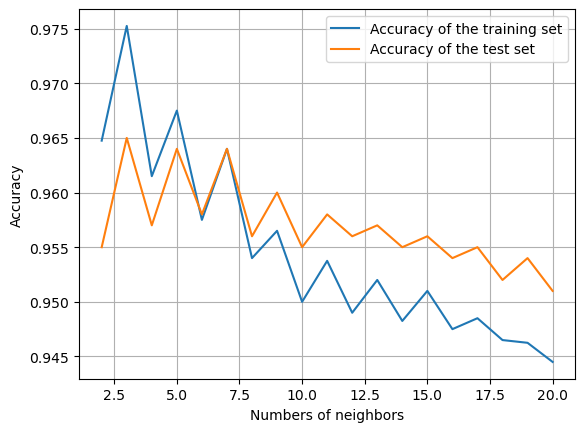

In [87]:
training_acc=[]
test_acc=[]
#Try KNN for different K-nearest neighbors from 1 to 1
neighbors_setting=range (2, 21)
for i in neighbors_setting:
    knn=KNeighborsClassifier(i)
    knn.fit(x_train, y_train.ravel())
    training_acc.append(knn.score(x_train, y_train))#?
    test_acc.append(knn.score(x_test, y_test))
    
plt.plot(neighbors_setting,training_acc, label="Accuracy of the training set")
plt.plot(neighbors_setting, test_acc, label= 
            "Accuracy of the test set")
plt.ylabel("Accuracy")
plt.xlabel("Numbers of neighbors")
plt.grid()
plt.legend()

The result of the plot shows that k=5 has the most accuracy and is the optimum k

                                                        Getting Output for sample data

In [88]:
sample=[42,16,30,92037,3,1.2,3,0,1,0,1,1]
# Reshape the sample array to 2D
sample = np.array(sample).reshape(1, -1)

In [101]:

                                                          #1. Logitic Regression
from sklearn.metrics import classification_report, confusion_matrix, log_loss


# train & test
x_train , x_test , y_train , y_test = train_test_split (X_selected , y , test_size = 0.11 , random_state = 0)#testsiz0.11 improved the Log_reg model

#modeling
logreg_final = LogisticRegression(C=1, max_iter=90, penalty='l2', solver='liblinear')  # best parameters for Log_reg

# train & predict
logreg_final.fit (x_train , y_train.ravel())
y_pred_logreg_final= logreg_final.predict (sample)
print("y_pred_logreg_final",y_pred_logreg_final)



# Train model on training data


y_prob = logreg_final.predict_proba(x_test)

# Calculate cost function
cost = log_loss(y_test, y_prob)

print("Cost Function:", cost)

y_pred_logreg_final [0]
Cost Function: 0.1299805416625599


In [90]:
                                                        #2. Naive Bayes Modeling 

x_train , x_test , y_train , y_test = train_test_split (X_selected , y , test_size = 0.16 , random_state = 0)#testsiz0.16 improved the  model

gnb_final = GaussianNB(var_smoothing= 1.0)# 'var_smoothing': 1.0 is the best parameter for the model
gnb_final.fit(x_train , y_train.ravel())
y_pred_gnb_final= gnb_final.predict (sample)
print('y_pred_gnb_final',y_pred_gnb_final)

# Modeling with Gaussian Naive Bayes 
gnb_final = GaussianNB()
gnb_final.fit(x_train, y_train)

# Calculate predicted probabilities
y_prob = gnb_final.predict_proba(x_test)

# Calculate log loss (cost function)
cost = log_loss(y_test, y_prob)

print("Cost Function:", cost)

y_pred_gnb_final [0]
Cost Function: 0.48572831141856504


In [100]:

#                                                          3.Complement Naive Bayes
# Scaling with MinMaxScaler, 
scaler = MinMaxScaler()
X_selected = scaler.fit_transform(x)
x_train , x_test , y_train , y_test = train_test_split (X_selected , y , test_size = 0.16 , random_state = 0)#testsiz0.16 improved the  model
cnb_final = ComplementNB(alpha= 0.1,fit_prior= True, norm= True)
cnb_final.fit(x_train , y_train.ravel())
y_pred_cnb_final= cnb_final.predict (sample)
print('y_pred_cnb_final', y_pred_cnb_final)


# Calculate predicted probabilities
y_prob = cnb_final.predict_proba(x_test)

# Calculate log loss (cost function)
cost = log_loss(y_test, y_prob)

print("Cost Function:", cost)

y_pred_cnb_final [0]
Cost Function: 0.6796744523518757


In [96]:
# 4.MultinomialNB Modeling 
x_train , x_test , y_train , y_test = train_test_split (X_selected , y , test_size = 0.1 , random_state = 0)
mnb_final = MultinomialNB(alpha=0.1, fit_prior= True)
mnb_final.fit(x_train , y_train.ravel())
y_pred_mnb_final= mnb_final.predict (sample)
print("y_pred_mnb_final", y_pred_mnb_final)


# Calculate predicted probabilities
y_prob = mnb_final.predict_proba(x_test)

# Calculate log loss (cost function)
cost = log_loss(y_test, y_prob)

print("Cost Function:", cost)


y_pred_mnb_final [0]
Cost Function: 0.2358732505801576


In [97]:
#5. BernoulliNB Modeling
x_train , x_test , y_train , y_test = train_test_split (X_selected , y , test_size = 0.1 , random_state = 0)#testsiz0.16 improved the  model
bnb_final = BernoulliNB(alpha= 0.1, binarize= 0.0, fit_prior=True)
bnb_final.fit(x_train , y_train.ravel())
y_pred_bnb_final= bnb_final.predict (sample)
print ('y_pred_bnb_final', y_pred_bnb_final)

# Calculate predicted probabilities
y_prob = bnb_final.predict_proba(x_test)

# Calculate log loss (cost function)
cost = log_loss(y_test, y_prob)

print("Cost Function:", cost)

y_pred_bnb_final [0]
Cost Function: 0.2513912553776469


In [98]:
#6.KNN Model
x_train , x_test , y_train , y_test = train_test_split (X_selected , y , test_size = 0.2 , random_state = 0)
knn_final = KNeighborsClassifier(metric='euclidean', n_neighbors= 5, weights='distance')
knn_final.fit(x_train , y_train.ravel())
y_pred_knn_final= knn_final.predict (sample)
print('y_pred_knn_final', y_pred_knn_final)




# Calculate predicted probabilities
y_prob = knn_final.predict_proba(x_test)

# Calculate log loss (cost function)
cost = log_loss(y_test, y_prob)

print("Cost Function:", cost)

y_pred_knn_final [0]
Cost Function: 0.3727649665435833


                                                             Conclusion

In [99]:
Conclusion_algorithms={'Algorithms': 
['Logistic Regression', 'Gaussian NB', 'Complement Naive Bayes', 'MultinomialNB Modeling',   'BernoulliNB Modeling','KNN Modelling'], 
'Accuracy':
                       [ 0.9600, 0.93, 0.9114, 0.9052, 0.8980, 0.95529412], 
                "sample_results":
                       [ 0,0, 0, 0, 0,0] ,
                      "Cost Function": 
                      [0.1299,0.4857,0.6797,0.2358,0.2513,0.3727]}
Conclusion_algorithms=pd.DataFrame(Conclusion_algorithms)
Conclusion_algorithms
# Sort the DataFrame by the 'Accuracy' column in decending order(Note:ascending=False)
Conclusion_algorithms_sorted = Conclusion_algorithms.sort_values(by='Accuracy', ascending=False)
Conclusion_algorithms_sorted

,Algorithms,Accuracy,sample_results,Cost Function
0,Logistic Regression,0.960000,0,0.1291
5,KNN Modelling,0.955294,0,0.3727
1,Gaussian NB,0.930000,0,0.4857
2,Complement Naive Bayes,0.911400,0,0.6796
3,MultinomialNB Modeling,0.905200,0,0.2358
4,BernoulliNB Modeling,0.898000,0,0.2513
